In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
df = pd.read_csv('superstore.csv')

In [5]:
df.columns

Index(['Order ID', 'Ship Mode', 'Segment', 'Region', 'Product ID', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.head()

,Order ID,Ship Mode,Segment,Region,Product ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Second Class,Consumer,South,FUR-BO-10001798,261.9600,2,0%,41.9136
1,CA-2016-152156,Second Class,Consumer,South,FUR-CH-10000454,731.9400,3,0%,219.5820
2,CA-2016-138688,Second Class,Corporate,West,OFF-LA-10000240,14.6200,2,0%,6.8714
3,US-2015-108966,Standard Class,Consumer,South,FUR-TA-10000577,957.5775,5,0.45%,-383.0310
4,US-2015-108966,Standard Class,Consumer,South,OFF-ST-10000760,22.3680,2,0.20%,2.5164


In [46]:
def describe_numerical_data(df: pd.DataFrame):
    numerical_data = df.select_dtypes(include=[np.number])
    description = numerical_data.describe()
    return description

def display_scrollable_table_html(description):
    html_output = description.to_html()
    html_with_scroll = f"<div style='overflow-x: auto;'>{html_output}</div>"
    display(HTML(html_with_scroll))

def describe_categorical_data(data):
    categorical_data = data.select_dtypes(include=['object'])
    description = categorical_data.describe()
    return description

In [47]:
numerical_description_df = describe_numerical_data(df)

In [48]:
display_scrollable_table_html(numerical_description_df.T)

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,15.620272,20.645197,0.000,0.00000,20.0000,20.000,80.000
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [49]:
categorical_description_df = describe_categorical_data(df)

In [50]:
display_scrollable_table_html(categorical_description_df.T)

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Region,9994,4,West,3203
Product ID,9994,1862,OFF-PA-10001970,19


## Superstore I
Plot a bar chart comparing the average discount across all regions, and find the region that offers the highest average discount.

Note: You need to clean the discount column first.

### 1.1: Cleaning the discount column.

In [51]:
df['Discount']

0        0.0
1        0.0
2        0.0
3       45.0
4       20.0
        ... 
9989    20.0
9990     0.0
9991    20.0
9992     0.0
9993     0.0
Name: Discount, Length: 9994, dtype: float64

In [44]:
df['Discount'] = df['Discount'].str.rstrip('%').apply(lambda x: float(x) * 100)

0        0.0
1        0.0
2        0.0
3       45.0
4       20.0
        ... 
9989    20.0
9990     0.0
9991    20.0
9992     0.0
9993     0.0
Name: Discount, Length: 9994, dtype: float64

### 1.2: Plotting the bar chart.

- Compare average discount accross all regions.
- find the region that offers the highest average discount.

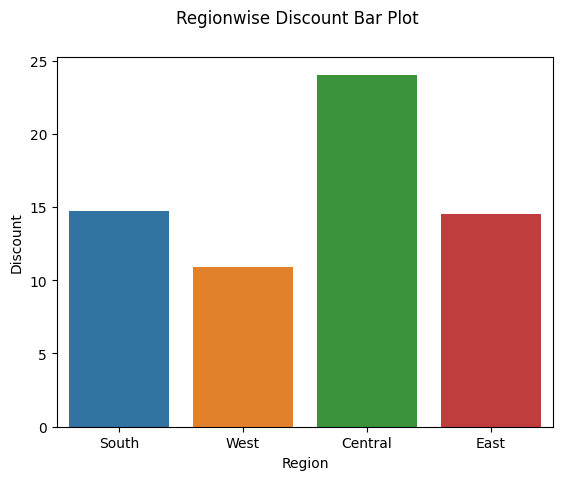

In [56]:
regionwise_discount_barplot = sns.barplot(data=df, x="Region", y="Discount", estimator=np.mean, errorbar=('ci', False))
plt.suptitle('Regionwise Discount Bar Plot')
plt.show()

## SuperStore III
Which of the following regions has the highest average Sales value for the 'Home Office' segment?

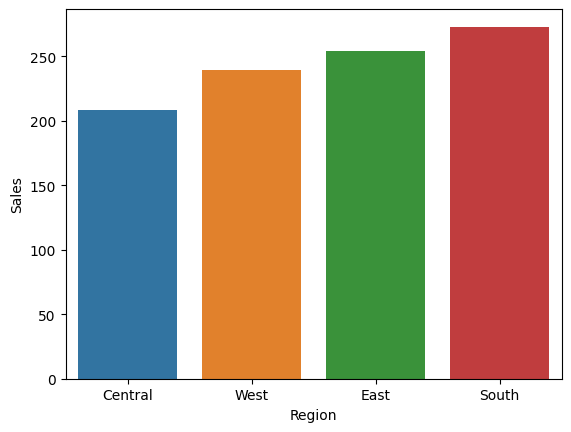

In [64]:
regionwise_homesegment_sales_barplot = sns.barplot(data=df[df['Segment'] == 'Home Office'], x="Region", y="Sales", estimator=np.mean, errorbar=('ci', False))

## SuperStore IV
- Analyze the spread of sales value below $100$ by using a box plot.
- Which of the following regions has the highest number of outliers if you consider only the observations with a sales value of less than $100?

In [65]:
below_100_sales_df = df[df['Sales'] < 100]

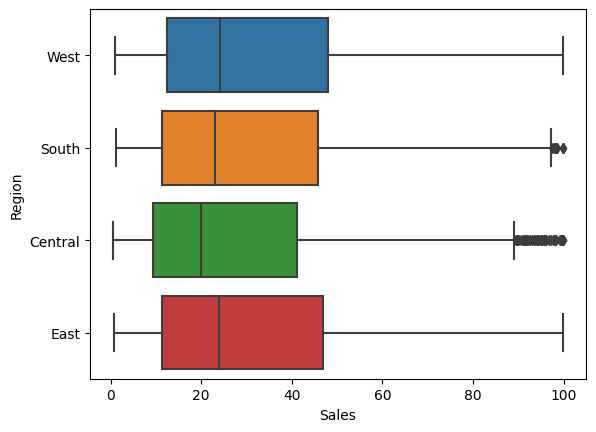

In [69]:
sales_boxplot = sns.boxplot(data=below_100_sales_df, x="Sales", y="Region")